# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_file/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
# convert cities list into a pandas dataframe
cities_df = pd.DataFrame(cities)

# Rename column
cities_df = cities_df.rename(columns={0: "City"})
cities_df.head()

,City
0,zimatlan
1,vila velha
2,ribeira grande
3,mar del plata
4,umzimvubu


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# params dictionary to update each iteration
params = {
    "appid": weather_api_key,
    "units": "metric"
}

# Add columns for lat, lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

# counters to keep track of record number per set
record_no = 1
set_no = 1


print("Beginning Data Retrieval")
print("------------------------------")


# Use the city name to identify lat, lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
for index, row in cities_df.iterrows():
    
    # get city from dataframe
    city = row["City"]

    # change location each iteration while leaving original params in place
    params["q"] = f"{city}"

    # Use the units term to return metric data for each city
    base_url = "https://api.openweathermap.org/data/2.5/weather?"

    # make request and convert to json
    city_detail = requests.get(base_url, params=params).json()

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        
        # Adding collected data to cities dataframe
        cities_df.loc[index, "Lat"] = city_detail['coord']['lat']
        cities_df.loc[index, "Lng"] = city_detail["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_detail["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = city_detail["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = city_detail["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = city_detail["wind"]["speed"]
        cities_df.loc[index, "Country"] = city_detail["sys"]["country"]
        cities_df.loc[index, "Date"] = city_detail["dt"]
        
        # Print Record
        print(f"Processing Record {record_no} of set {set_no} | {city}")
        
        # Add to record counter
        record_no += 1
    
    # Add except 
    except (KeyError, IndexError):
        print("City not found. Skipping....")
        
        # Drop city if not found
        cities_df.drop(index, inplace=True)
        
        # Reset record counter
        record_no = 1
        
        # Add to set counter
        set_no += 1
print("----------------------------- Data Retrieval Complete -----------------------------")

# Reset index
cities_df.reset_index(drop=True, inplace=True)

Beginning Data Retrieval
------------------------------
City not found. Skipping....
Processing Record 1 of set 2 | vila velha
Processing Record 2 of set 2 | ribeira grande
Processing Record 3 of set 2 | mar del plata
City not found. Skipping....
Processing Record 1 of set 3 | thompson
Processing Record 2 of set 3 | sao joao da barra
Processing Record 3 of set 3 | mulchen
Processing Record 4 of set 3 | vanavara
Processing Record 5 of set 3 | baay
Processing Record 6 of set 3 | busselton
Processing Record 7 of set 3 | pevek
Processing Record 8 of set 3 | ushuaia
Processing Record 9 of set 3 | cape town
Processing Record 10 of set 3 | ternate
Processing Record 11 of set 3 | provideniya
Processing Record 12 of set 3 | rikitea
City not found. Skipping....
Processing Record 1 of set 4 | mackenzie
Processing Record 2 of set 4 | port elizabeth
Processing Record 3 of set 4 | umm lajj
Processing Record 4 of set 4 | fernley
Processing Record 5 of set 4 | yellowknife
Processing Record 6 of set 4 

Processing Record 11 of set 17 | ciechocinek
Processing Record 12 of set 17 | burla
Processing Record 13 of set 17 | humaita
Processing Record 14 of set 17 | ambanja
Processing Record 15 of set 17 | borova
City not found. Skipping....
Processing Record 1 of set 18 | kahului
Processing Record 2 of set 18 | ancud
Processing Record 3 of set 18 | ahipara
Processing Record 4 of set 18 | nsanje
Processing Record 5 of set 18 | kulhudhuffushi
Processing Record 6 of set 18 | bowen
Processing Record 7 of set 18 | cherskiy
Processing Record 8 of set 18 | fare
Processing Record 9 of set 18 | panguna
Processing Record 10 of set 18 | rabaul
Processing Record 11 of set 18 | ambatondrazaka
Processing Record 12 of set 18 | stornoway
Processing Record 13 of set 18 | portobelo
Processing Record 14 of set 18 | longyearbyen
Processing Record 15 of set 18 | san quintin
Processing Record 16 of set 18 | dunedin
Processing Record 17 of set 18 | souillac
Processing Record 18 of set 18 | matara
Processing Record

Processing Record 6 of set 32 | havoysund
Processing Record 7 of set 32 | fortuna
Processing Record 8 of set 32 | batagay-alyta
Processing Record 9 of set 32 | ormara
Processing Record 10 of set 32 | avenal
Processing Record 11 of set 32 | hirara
Processing Record 12 of set 32 | isangel
Processing Record 13 of set 32 | khash
Processing Record 14 of set 32 | alice springs
Processing Record 15 of set 32 | cuenca
Processing Record 16 of set 32 | vaitape
Processing Record 17 of set 32 | sandusky
City not found. Skipping....
Processing Record 1 of set 33 | daru
Processing Record 2 of set 33 | qaqortoq
Processing Record 3 of set 33 | kavaratti
Processing Record 4 of set 33 | saint anthony
Processing Record 5 of set 33 | ankazobe
Processing Record 6 of set 33 | kushmurun
Processing Record 7 of set 33 | salym
Processing Record 8 of set 33 | altamont
Processing Record 9 of set 33 | gumdag
Processing Record 10 of set 33 | moranbah
Processing Record 11 of set 33 | olinda
Processing Record 12 of s

Processing Record 20 of set 47 | prado
Processing Record 21 of set 47 | ligayan
Processing Record 22 of set 47 | san cristobal
Processing Record 23 of set 47 | presidencia roque saenz pena
Processing Record 24 of set 47 | djougou
Processing Record 25 of set 47 | bathsheba
Processing Record 26 of set 47 | zigong
Processing Record 27 of set 47 | lebanon
Processing Record 28 of set 47 | khorixas
Processing Record 29 of set 47 | ylivieska
Processing Record 30 of set 47 | kiboga
City not found. Skipping....
Processing Record 1 of set 48 | marsa matruh
Processing Record 2 of set 48 | nanaimo
Processing Record 3 of set 48 | gbarnga
Processing Record 4 of set 48 | cartagena del chaira
Processing Record 5 of set 48 | udachnyy
Processing Record 6 of set 48 | turukhansk
Processing Record 7 of set 48 | iseyin
Processing Record 8 of set 48 | tautira
----------------------------- Data Retrieval Complete -----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a .csv.
cities_df.to_csv(output_data_file)  

# Display the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,21.97,80,0,6.17,BR,1662795207
1,ribeira grande,38.5167,-28.7,23.22,78,40,10.29,PT,1662795208
2,mar del plata,-38.0023,-57.5575,4.41,87,0,5.36,AR,1662795209
3,thompson,55.7435,-97.8558,8.09,93,75,3.09,CA,1662795211
4,sao joao da barra,-21.6403,-41.0511,20.06,82,0,6.68,BR,1662795212


In [7]:
# Convert columns to float or int types
cities_df[cities_df.columns[1:4]] = cities_df.iloc[:, 1:4].astype('float64')
cities_df[cities_df.columns[4:6]] = cities_df.iloc[:, 4:6].astype('int64')
cities_df[cities_df.columns[6:7]] = cities_df.iloc[:, 6:7].astype('float64')
cities_df[cities_df.columns[8:9]] = cities_df.iloc[:, 8:9].astype('int64')

# Display basic overview of the data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.00000,5.800000e+02
mean,20.286854,17.230707,19.352759,70.701724,53.655172,3.57269,1.662795e+09
std,33.626162,90.988893,8.695940,22.001389,41.324844,2.44495,1.471519e+02
min,-54.800000,-179.166700,-1.460000,2.000000,0.000000,0.00000,1.662795e+09
25%,-6.908575,-64.051875,11.415000,61.000000,7.000000,1.79000,1.662795e+09
50%,22.384400,20.087500,21.330000,77.000000,61.500000,3.08500,1.662795e+09
75%,49.862575,100.340125,26.295000,86.000000,100.000000,4.77250,1.662796e+09
max,78.218600,179.316700,40.390000,100.000000,100.000000,12.68000,1.662796e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
over_100 = cities_df.index[cities_df["Humidity"] > 100].tolist()
print(over_100)

[]


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity cities with over 100%
clean_cities_df = cities_df.drop(index = over_100, inplace=False)

# Reset index
clean_cities_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,21.97,80,0,6.17,BR,1662795207
1,ribeira grande,38.5167,-28.7000,23.22,78,40,10.29,PT,1662795208
2,mar del plata,-38.0023,-57.5575,4.41,87,0,5.36,AR,1662795209
3,thompson,55.7435,-97.8558,8.09,93,75,3.09,CA,1662795211
4,sao joao da barra,-21.6403,-41.0511,20.06,82,0,6.68,BR,1662795212


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Setup vairable to be used accross all plots
lat = clean_cities_df["Lat"]

# Add todays dat and format to DD/MM/YYY
today = date.today()
date = today.strftime("%d/%m/%Y")

## Latitude vs. Temperature Plot

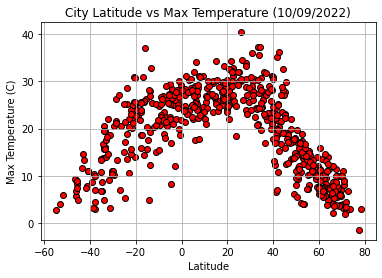

In [11]:
# Setup vairable
temperature = clean_cities_df['Max Temp']

# Creat scatter plot
plt.scatter(lat,temperature, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Temperature_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the maximim temperature in that city.

## Latitude vs. Humidity Plot

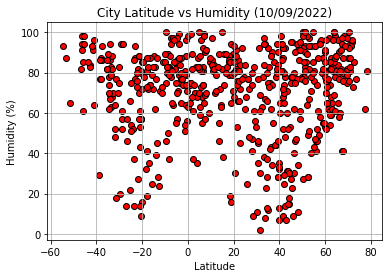

In [12]:
# Setup vairable
humidity = clean_cities_df['Humidity']

# Creat scatter plot
plt.scatter(lat,humidity, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Humidity_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the humidity in that city.

## Latitude vs. Cloudiness Plot

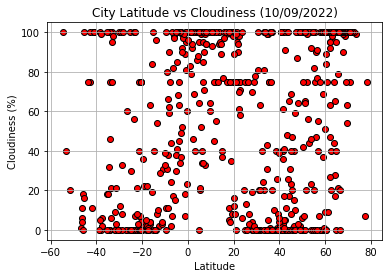

In [13]:
# Setup vairable
cloudiness = clean_cities_df['Cloudiness']

# Creat scatter plot
plt.scatter(lat,cloudiness, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Cloudiness_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the cloudiness in that city.

## Latitude vs. Wind Speed Plot

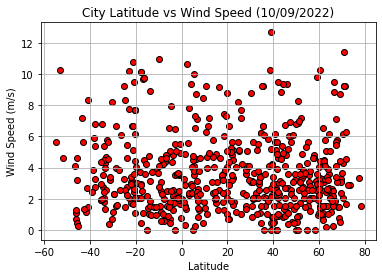

In [14]:
# Setup vairable
wind_speed = clean_cities_df['Wind Speed']

# Creat scatter plot
plt.scatter(lat,wind_speed, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Wind_Speed_Plot.png")

# Display grid
plt.show()

## Linear Regression

In [15]:
# create seperate dataframes split into southern and northen hemispheres
north_hem_clean_cities_df = clean_cities_df.loc[clean_cities_df["Lat"] >= 0]
south_hem_clean_cities_df = clean_cities_df.loc[clean_cities_df["Lat"] < 0]

In [16]:
# Setup vairable to be used accross all plots
north_lat = north_hem_clean_cities_df["Lat"]
south_lat = south_hem_clean_cities_df["Lat"]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6533826902712359


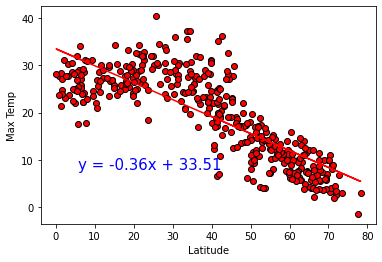

In [27]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Max Temp"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(5.8,8),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Max_Temp_Plot.png")

plt.show()

## Enter findings here

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.502657889628127


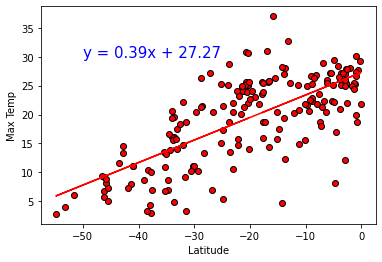

In [28]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Max Temp"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq2,(-50,30),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Max_Temp_Plot.png")

plt.show()

## Enter findings here

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003735790828115853


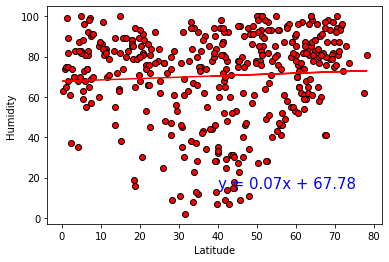

In [29]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Humidity"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(40,15),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Humidity_Plot.png")

plt.show()

## Enter findings here

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00036153587074962015


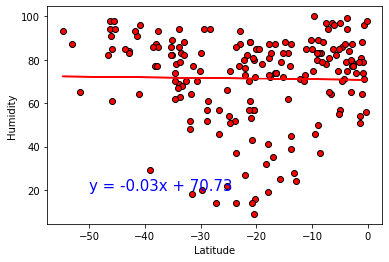

In [30]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Humidity"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Humidity_Plot.png")

plt.show()

## Enter findings here

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.2785963027334083e-05


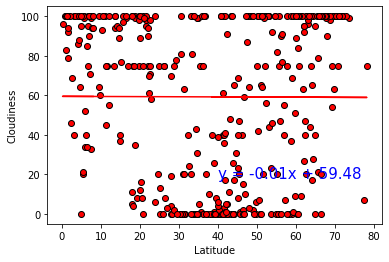

In [31]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Cloudiness"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(40,18),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

plt.show()

## Enter findings here

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029627416080916277


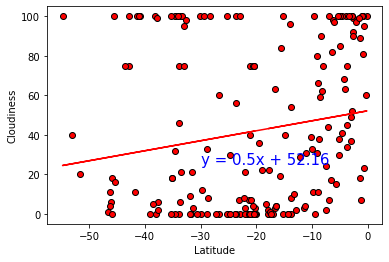

In [32]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Cloudiness"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-30,25),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

plt.show()

## Enter findings here

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00279627800720121


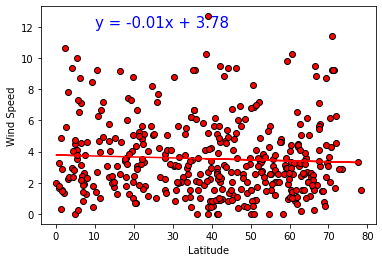

In [33]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Wind Speed"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(10,12),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")

plt.show()

## Enter findings here

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012082010145912076


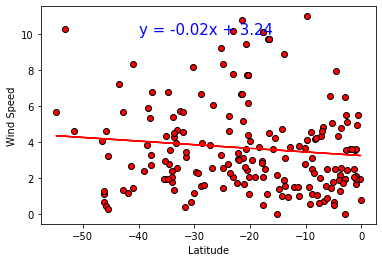

In [34]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Wind Speed"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-40,10),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")

plt.show()

## Enter findings here